# Task 4.10

In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


### 01.

In [4]:
# importing data frame
path = r'C:\Users\Ali\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 4\15-08-2025 Instacart Basket Analysis'
final_dataframe = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe.pkl'))

### 02. PII Check

In [21]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 33 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int64   
 1   user_id                     int64   
 2   order_number                int64   
 3   orders_day_of_week          int64   
 4   order_hour_of_day           int64   
 5   days_since_prior_order      float64 
 6   is_first_order              int64   
 7   product_id                  int64   
 8   add_to_cart_order           int64   
 9   reordered                   int64   
 10  product_name                object  
 11  aisle_id                    Int64   
 12  department_id               Int64   
 13  prices                      float64 
 14  price_range_loc             object  
 15  busiest_days                object  
 16  busiest_period_of_day       object  
 17  max_order                   int64   
 18  loyalty_flag                object  
 19

##### This data set contains some potential PII(personally identifiable information) data like Name, Gender, State, Age and Income. In order to optimize user privacy, strong access control mechanisams will be implemented to limit who can see PII. Moreover all the GDPR regulations regarding data privacy will be strictly followed when working with this data. Lastly any reports or presentations will use aggregated insights without exposing individual personal details.¶

### 03.(a) Create Region Column

In [5]:
# northeast states
northeast_states = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts',
    'Rhode Island', 'Connecticut', 'New York',
    'Pennsylvania', 'New Jersey'
]

final_dataframe.loc[final_dataframe['state'].isin(northeast_states), 'region'] = 'Northeast'

In [6]:
# midwest states
midwest_states = [
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana',
    'Ohio', 'North Dakota', 'South Dakota',
    'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
]

final_dataframe.loc[final_dataframe['state'].isin(midwest_states), 'region'] = 'Midwest'

In [7]:
# south states
south_states = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
    'North Carolina', 'South Carolina', 'Georgia', 'Florida',
    'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
    'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
]

final_dataframe.loc[final_dataframe['state'].isin(south_states), 'region'] = 'South'


In [8]:
# west states
west_states = [
    'Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico',
    'Arizona', 'Utah', 'Nevada', 'California', 'Oregon',
    'Washington', 'Alaska', 'Hawaii'
]

final_dataframe.loc[final_dataframe['state'].isin(west_states), 'region'] = 'West'


In [9]:
print(final_dataframe[['state', 'region']].head())


     state region
0  Alabama  South
1  Alabama  South
2  Alabama  South
3  Alabama  South
4  Alabama  South


In [9]:
final_dataframe['state'].isnull().any()


np.False_

### 03.(b) Inspecting customer spending habits across regions

In [10]:
# creating a cross table among Region and spending flag
crosstab = pd.crosstab(final_dataframe['region'], final_dataframe['spending_flag'], dropna = False)

In [29]:
crosstab.to_clipboard()

In [11]:
#checking the spending habits differences between U.S States
pd.crosstab(final_dataframe["region"], final_dataframe["spending_flag"],dropna=False)

spending_flag,High spender,Low spender
region,,
Midwest,1888634,5708536
Northeast,1390851,4331792
South,2752265,8039434
West,2069867,6222910


In [12]:
# Count of each spending flag by region
spending_counts = final_dataframe.groupby(['region', 'spending_flag']).size().unstack(fill_value=0)


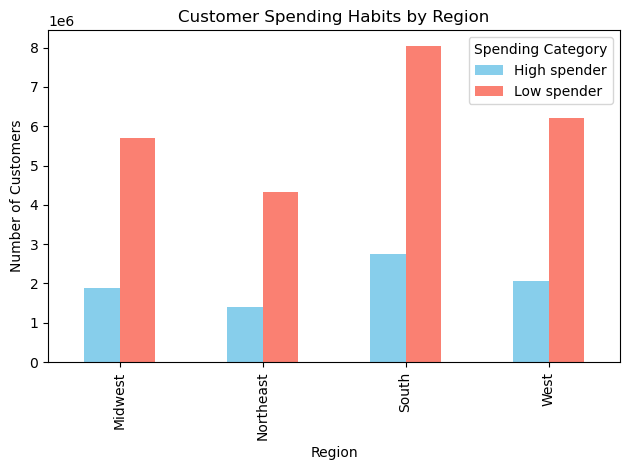

In [13]:
# customer spending habits by region chart
spending_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Customer Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Category')
plt.tight_layout()

# exporting the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Region_wise_spending.png'), dpi=300, bbox_inches='tight')

#### South has the highest number of both High (2.75 million) and Low spenders (8.03 million), whereas Northeast region has the lowest number of High spenders with only 1.3 million, compared to over 2.75 million in the South. In all regions, Low spenders outnumber High spenders. In terms of high spender percentage:
#### Midwest: ~24.9%
#### Northeast: ~24.3%
#### South: ~25.5%
#### West: ~25.0%
#### High spender ratio seems fairly consistent across all regions i.e. roughly 25%.

#### 04. Exclusion flag for low activity customers

In [14]:
final_dataframe.shape

(32404289, 34)

In [68]:
pd.set_option('display.max_columns', None)

In [ ]:
final_dataframe.head()

In [15]:
# Exclusion flag for low activity customers
final_dataframe.loc[final_dataframe['max_order'] < 5, 'exclusion_flag'] = 'low activity'
final_dataframe.loc[final_dataframe['max_order'] >= 5, 'exclusion_flag'] = 'high activity'

In [16]:
# filtering out low activity customers
high_activity_df = final_dataframe[final_dataframe['exclusion_flag'] == 'high activity']
# resetting index
high_activity_df = high_activity_df.reset_index(drop=True)


In [17]:
# Exporting data frame which only contains customers with 5 or more total orders.
high_activity_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_highactivity_customers.pkl'))

In [18]:
high_activity_df.shape

(30964041, 35)

### 05. Customer Profiling

In [19]:
# Step 1: Get most ordered from department per user
most_ordered_dept = (
    high_activity_df
    .groupby(['user_id'])['department_id']
    .value_counts()
    .groupby(level=0)
    .idxmax()
    .reset_index(name='most_ordered_department')
)


In [20]:
# Step 2: Extract just the department_id from the MultiIndex
most_ordered_dept['most_ordered_department'] = most_ordered_dept['most_ordered_department'].apply(lambda x: x[1])


In [21]:
# dding department mapping
dept_map = {
   1: 'Stock-Up Shopper',          # frozen
    2: 'General Shopper',           # other
    3: 'Leisure Shopper',           # bakery
    4: 'Health-Conscious',          # produce
    5: 'Leisure Shopper',           # alcohol
    6: 'Health-Conscious',          # international
    7: 'Leisure Shopper',           # beverages
    8: 'Family Shopper',            # pets
    9: 'Stock-Up Shopper',          # dry goods pasta
    10: 'Stock-Up Shopper',         # bulk
    11: 'Routine Essentials',       # personal care
    12: 'Routine Essentials',       # meat seafood
    13: 'Stock-Up Shopper',         # pantry
    14: 'Routine Essentials',       # breakfast
    15: 'Stock-Up Shopper',         # canned goods
    16: 'Routine Essentials',       # dairy eggs
    17: 'Family Shopper',           # household
    18: 'Family Shopper',           # babies
    19: 'Leisure Shopper',          # snacks
    20: 'Routine Essentials',       # deli
    21: 'Unknown'                   # missing
}


In [22]:
most_ordered_dept['dept_type'] = most_ordered_dept['most_ordered_department'].map(dept_map)


In [23]:
# Step 3: Merge back to original DataFrame
high_activity_df = high_activity_df.merge(
    most_ordered_dept[['user_id', 'most_ordered_department', 'dept_type']],
    on='user_id',
    how='left'
)

In [24]:
department_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}
# Add a new column by mapping department_id to department_name
high_activity_df['department_name'] = high_activity_df['department_id'].map(department_map)

In [25]:
high_activity_df.shape

(30964041, 38)

In [26]:
high_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964041 entries, 0 to 30964040
Data columns (total 38 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int64   
 1   user_id                     int64   
 2   order_number                int64   
 3   orders_day_of_week          int64   
 4   order_hour_of_day           int64   
 5   days_since_prior_order      float64 
 6   is_first_order              int64   
 7   product_id                  int64   
 8   add_to_cart_order           int64   
 9   reordered                   int64   
 10  product_name                object  
 11  aisle_id                    Int64   
 12  department_id               Int64   
 13  prices                      float64 
 14  price_range_loc             object  
 15  busiest_days                object  
 16  busiest_period_of_day       object  
 17  max_order                   int64   
 18  loyalty_flag                object  
 19

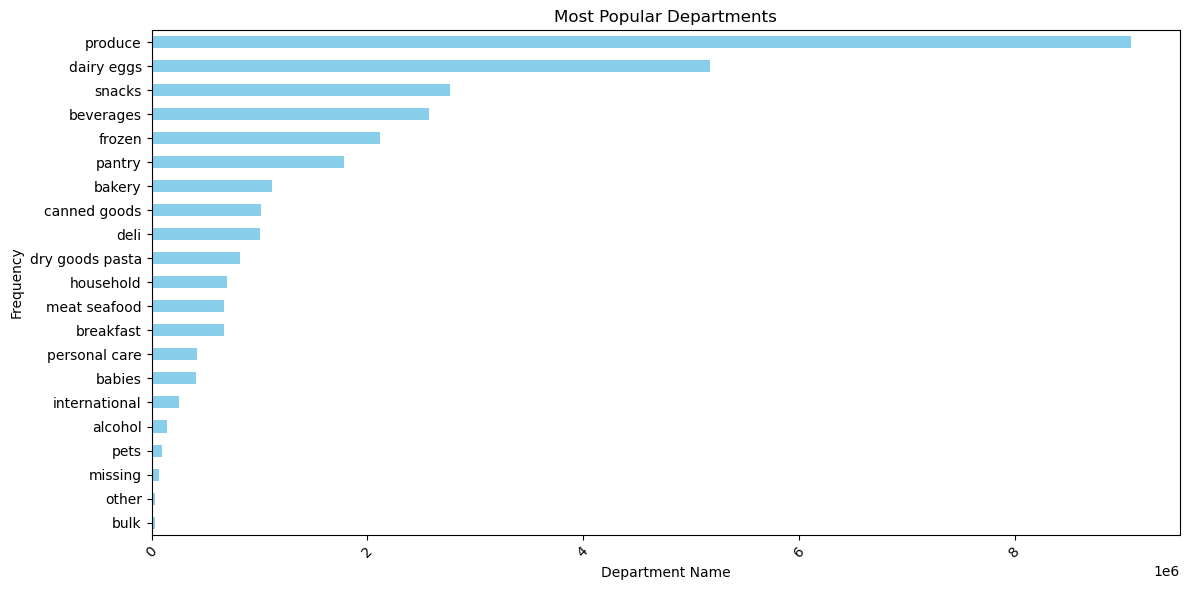

In [27]:
# Count frequency of each department
department_counts = high_activity_df['department_name'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
department_counts.plot(kind='barh',color='skyblue')
plt.title('Most Popular Departments')
plt.xlabel('Department Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()

# exporting the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'most_ordered_dept.png'), dpi=300, bbox_inches='tight')

In [ ]:
high_activity_df.head()

##### profiling on the basis of age, number of dependents and income.

In [26]:
# 2. Demographic groupings
def get_age_group(age):
    if age < 25:
        return 'Young Adult'
    elif 25 <= age < 40:
        return 'Adult'
    elif 40 <= age < 60:
        return 'Middle-Aged'
    else:
        return 'Senior'

def get_income_group(income):
    if income < 30000:
        return 'Low Income'
    elif income < 70000:
        return 'Middle Income'
    else:
        return 'High Income'

def get_family_size_group(dependents):
    if dependents == 0:
        return 'Single'
    elif dependents <= 2:
        return 'Small Family'
    else:
        return 'Large Family'

high_activity_df['age_group'] = high_activity_df['age'].apply(get_age_group)
high_activity_df['income_group'] = high_activity_df['income'].apply(get_income_group)
high_activity_df['family_size'] = high_activity_df['n_dependants'].apply(get_family_size_group)


In [27]:
# 3. Time Behavior
def get_time_profile(row):
    day = row['orders_day_of_week']
    hour = row['order_hour_of_day']
    
    if day in [2,3,4,5,6] and 6 <= hour <= 11:
        return 'Weekday Morning'
    elif day in [2,3,4,5,6] and 17 <= hour <= 21:
        return 'Weekday Evening'
    elif hour >= 22 or hour < 5:
        return 'Late Night Shopper'
    elif day in [0,1] and 12 <= hour <= 18:
        return 'Weekend Afternoon'
    else:
        return 'General Shopper'

high_activity_df['time_behavior'] = high_activity_df.apply(get_time_profile, axis=1)

In [28]:
# 4. Combine into Profile

# Profile 1 based on age, financial status and shopping interests
high_activity_df['profile_demographic'] = (
    high_activity_df['age_group'] + ' | ' + 
    high_activity_df['income_group'] + ' | ' +
    high_activity_df['dept_type'].fillna('Unknown')
)



In [29]:
# Profile 2 based on num of dependents, prefered shopping time and family size

high_activity_df['household_type'] = high_activity_df['n_dependants'].apply(lambda x: 'Single' if x == 0 else 'Family')

high_activity_df['profile_lifestyle'] = (
    high_activity_df['household_type'] + ' | ' + 
    high_activity_df['time_behavior'] + ' | ' +
    high_activity_df['family_size']
)

### 06. Visualization to show distribution of profiles.

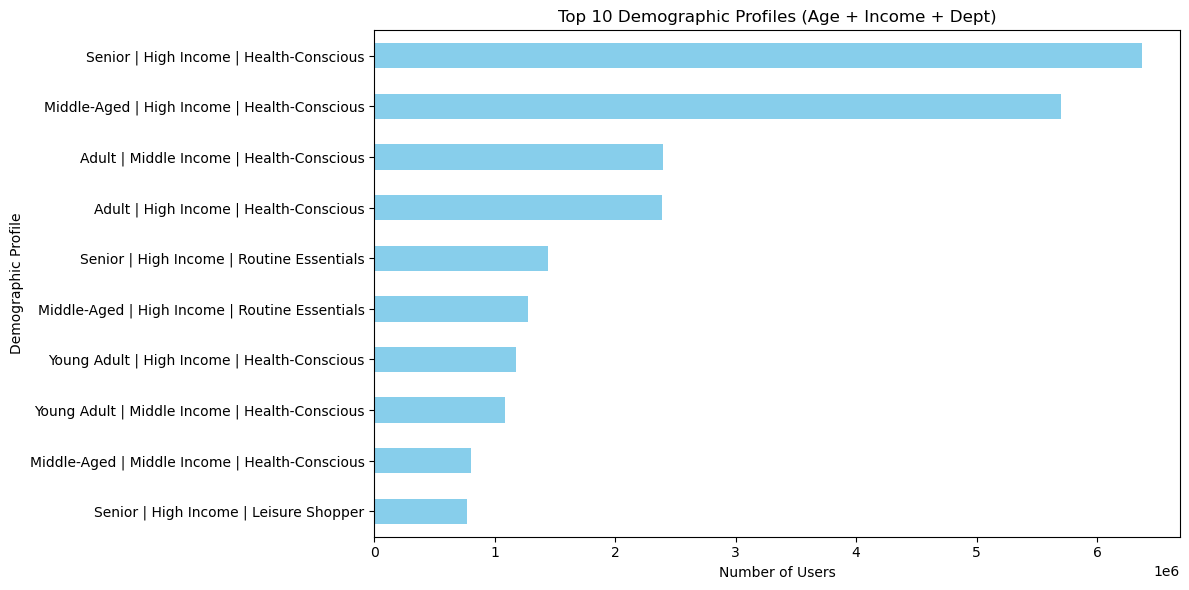

In [28]:
# Profile 1 distribution visualization

demographic_counts = high_activity_df['profile_demographic'].value_counts().head(10)


plt.figure(figsize=(12, 6))
demographic_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Users')
plt.ylabel('Demographic Profile')
plt.title('Top 10 Demographic Profiles (Age + Income + Dept)')
plt.gca().invert_yaxis()
plt.tight_layout()

# exporting the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_Demographic_profiles.png'), dpi=300, bbox_inches='tight')

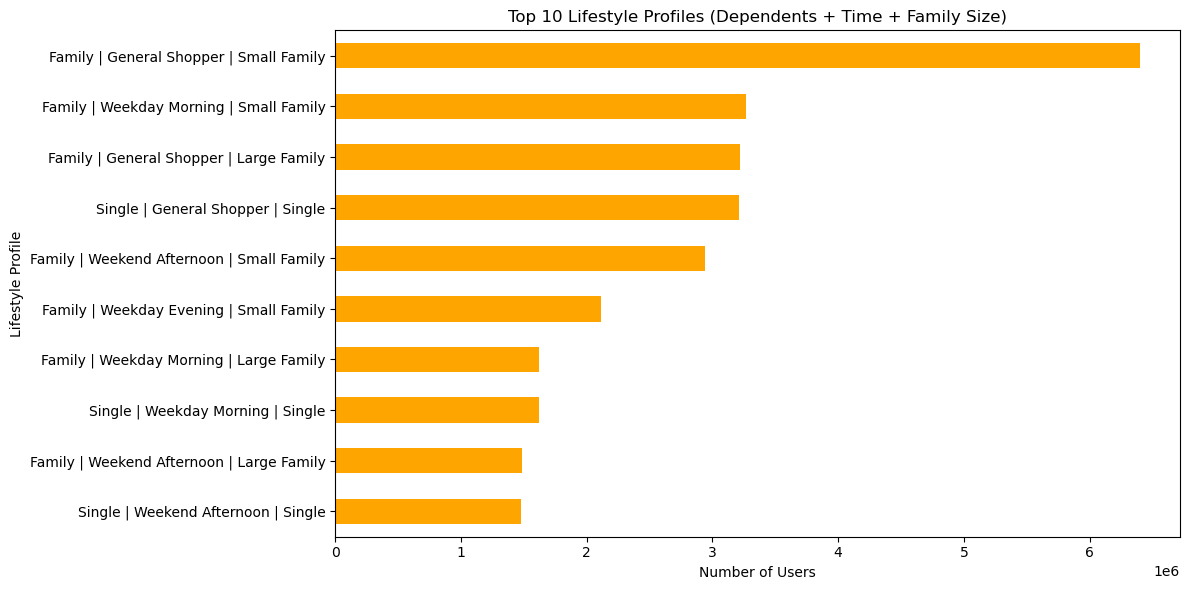

In [29]:
# Profile 2 distribution visualization

lifestyle_counts = high_activity_df['profile_lifestyle'].value_counts().head(10)

plt.figure(figsize=(12, 6))
lifestyle_counts.plot(kind='barh', color='orange')
plt.xlabel('Number of Users')
plt.ylabel('Lifestyle Profile')
plt.title('Top 10 Lifestyle Profiles (Dependents + Time + Family Size)')
plt.gca().invert_yaxis()
plt.tight_layout()

# exporting the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_lifestyle_profiles.png'), dpi=300, bbox_inches='tight')

#### 07.  customer profile-level usage frequency and expenditure.

In [ ]:
high_activity_df.head(60)

In [32]:
pd.set_option('display.max_columns', None)

#### a) profile_demopraphic aggregate (profile 1 )

In [34]:
# Group by customer profile 1 and aggregate

profile_stats_1 = high_activity_df.groupby('profile_demographic').agg({
    'Average_price': ['max', 'mean', 'min'],
    'median_days_between_orders': ['max', 'mean', 'min']
}).reset_index()


In [35]:
# Flatten column names
profile_stats_1.columns = ['_'.join(col).strip('_') for col in profile_stats_1.columns.values]


In [36]:
profile_stats_1

,profile_demographic,Average_price_max,Average_price_mean,Average_price_min,median_days_between_orders_max,median_days_between_orders_mean,median_days_between_orders_min
0,Adult | High Income | Family Shopper,14.050000,7.895855,6.439604,30.0,11.231802,2.0
1,Adult | High Income | General Shopper,8.268750,8.175676,8.104762,27.0,11.675676,0.0
2,Adult | High Income | Health-Conscious,13.633333,7.958255,6.438676,30.0,9.701818,0.0
3,Adult | High Income | Leisure Shopper,13.400000,7.794255,5.375000,30.0,10.026526,0.0
4,Adult | High Income | Routine Essentials,14.100000,7.980345,5.156306,30.0,9.931584,0.5
...,...,...,...,...,...,...,...
66,Young Adult | Middle Income | General Shopper,8.984211,7.995556,6.287879,30.0,15.433333,7.0
67,Young Adult | Middle Income | Health-Conscious,11.783333,7.801916,3.114286,30.0,9.836361,0.0
68,Young Adult | Middle Income | Leisure Shopper,13.400000,6.998112,2.000000,30.0,9.863956,0.0
69,Young Adult | Middle Income | Routine Essentials,13.878571,7.737974,2.863636,30.0,10.018584,0.0


#### b) profile_lifestyle aggregate (profile 2 )

In [37]:
# Group by customer profile 2 and aggregate

profile_stats_2 = high_activity_df.groupby('profile_lifestyle').agg({
    'Average_price': ['max', 'mean', 'min'],
    'median_days_between_orders': ['max', 'mean', 'min']
}).reset_index()


In [38]:
# Flatten column names
profile_stats_2.columns = ['_'.join(col).strip('_') for col in profile_stats_2.columns.values]

In [39]:
profile_stats_2

,profile_lifestyle,Average_price_max,Average_price_mean,Average_price_min,median_days_between_orders_max,median_days_between_orders_mean,median_days_between_orders_min
0,Family | General Shopper | Large Family,20.114286,7.784804,1.262500,30.0,9.875229,0.0
1,Family | General Shopper | Small Family,18.233333,7.780073,1.000000,30.0,9.886597,0.0
2,Family | Late Night Shopper | Large Family,17.620000,7.812745,2.433333,30.0,10.044880,0.0
3,Family | Late Night Shopper | Small Family,13.798667,7.818756,1.000000,30.0,10.150418,0.0
4,Family | Weekday Evening | Large Family,17.700000,7.817986,1.695238,30.0,10.084636,0.0
5,Family | Weekday Evening | Small Family,15.706667,7.810713,1.300000,30.0,10.161477,0.0
6,Family | Weekday Morning | Large Family,20.114286,7.753050,1.262500,30.0,9.446753,0.0
7,Family | Weekday Morning | Small Family,15.706667,7.757660,1.000000,30.0,9.437922,0.0
8,Family | Weekend Afternoon | Large Family,17.700000,7.830516,1.522222,30.0,10.539075,0.0
9,Family | Weekend Afternoon | Small Family,19.400000,7.824955,1.000000,30.0,10.564896,0.0


#### 08. Compare your customer profiles with regions and departments.

##### comparing customer Profile 1 with regions.

In [43]:
# Get top 10 most frequent profiles

top_profiles = high_activity_df['profile_demographic'].value_counts().head(10).index.tolist()

In [44]:
# counts of customers per profile within each region

profile_region_counts = high_activity_df.groupby(['region', 'profile_demographic']).size().reset_index(name='count')


In [45]:
# calculating percentage of customer in each profile in each region

profile_region_counts['region_total'] = profile_region_counts.groupby('region')['count'].transform('sum')
profile_region_counts['proportion'] = profile_region_counts['count'] / profile_region_counts['region_total']

filtered_profile_region = profile_region_counts[profile_region_counts['profile_demographic'].isin(top_profiles)]


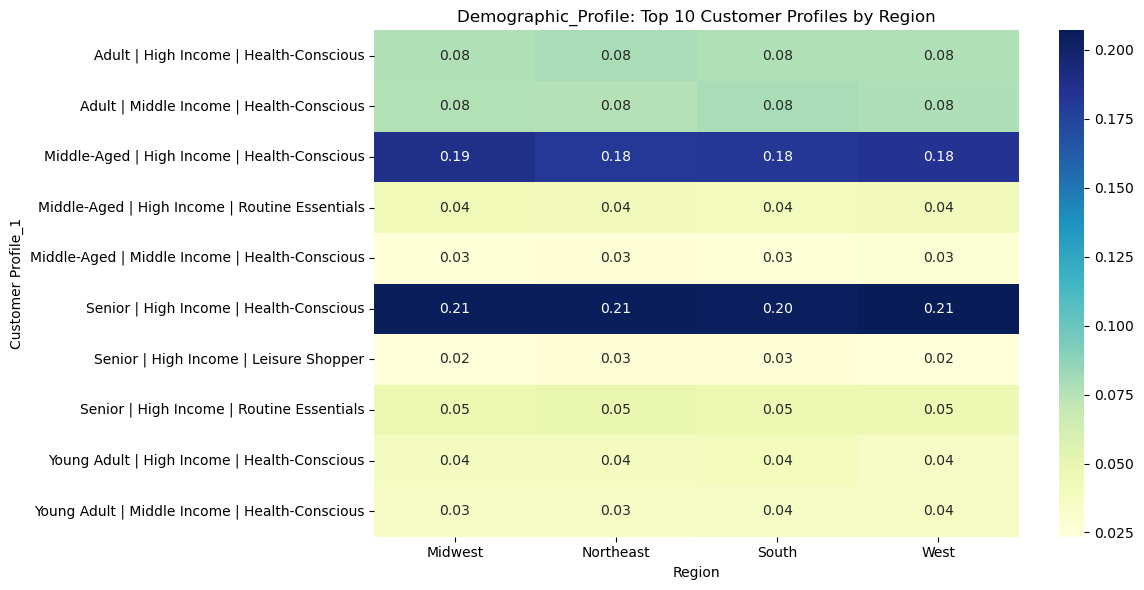

In [46]:
heatmap_data = filtered_profile_region.pivot(index='profile_demographic', columns='region', values='proportion')


# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Demographic_Profile: Top 10 Customer Profiles by Region')
plt.ylabel('Customer Profile_1')
plt.xlabel('Region')
plt.tight_layout()

# exporting the map
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'demographic_profile_heatmap_region.png'), dpi=300, bbox_inches='tight')


##### This heatmap shows that:
##### "Senior | High Income | Health-Conscious" is the most common profile across all regions (~20–21% everywhere). This group may be a prime target segment nationally.

##### "Middle-Aged | High Income | Health-Conscious" also has strong presence (18–19%) in all regions.
##### Profiles like "Young Adult | Middle Income | Health-Conscious" or "Senior | High Income | Leisure Shopper" have much lower values (2–4%).
##### These may be smaller or niche segments.
##### Regional consistency is high — the same profiles dominate across regions.

#### comparing customer Profile 2 with regions.

In [36]:
# profile_lifestyle
# Get top 10 most frequent profiles

top_profiles_2 = high_activity_df['profile_lifestyle'].value_counts().head(10).index.tolist()

In [37]:
# counts of customers per profile within each region

profile_region_counts_2 = high_activity_df.groupby(['region', 'profile_lifestyle']).size().reset_index(name='count')


In [39]:
#calculating percentage of customer in each profile in each region

profile_region_counts_2['region_total_2'] = profile_region_counts_2.groupby('region')['count'].transform('sum')
profile_region_counts_2['proportion_2'] = profile_region_counts_2['count'] / profile_region_counts_2['region_total_2']

filtered_profile_region_2 = profile_region_counts_2[profile_region_counts_2['profile_lifestyle'].isin(top_profiles_2)]

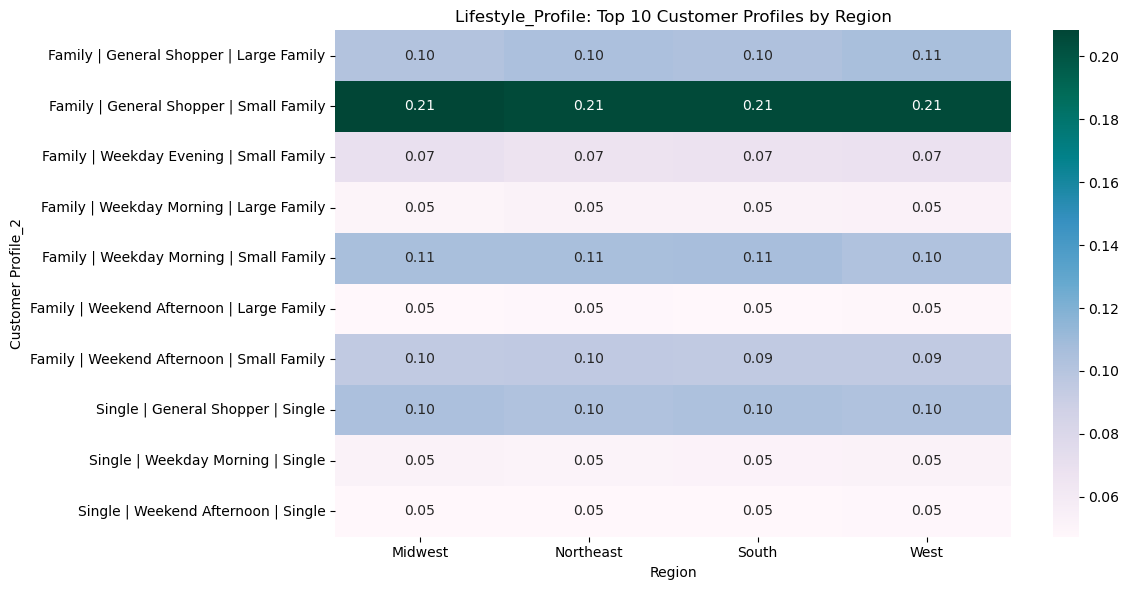

In [47]:
heatmap_data = filtered_profile_region_2.pivot(index='profile_lifestyle', columns='region', values='proportion_2')


# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="PuBuGn")
plt.title('Lifestyle_Profile: Top 10 Customer Profiles by Region')
plt.ylabel('Customer Profile_2')
plt.xlabel('Region')
plt.tight_layout()

# exporting the map
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lifestyle_profile_heatmap_region.png'), dpi=300, bbox_inches='tight')


#### This heatmap shows that most common profile is "Family | General Shopper | Small Family" (21%) — consistently high across all regions.
#### Profiles like "Single | Weekday Morning | Single" or "Family | Weekend Afternoon | Large Family" — around 5% are least common.
#### The pattern is very consistent across regions, profiles have the same or very similar proportions in each.

#### Department prefrences by region.

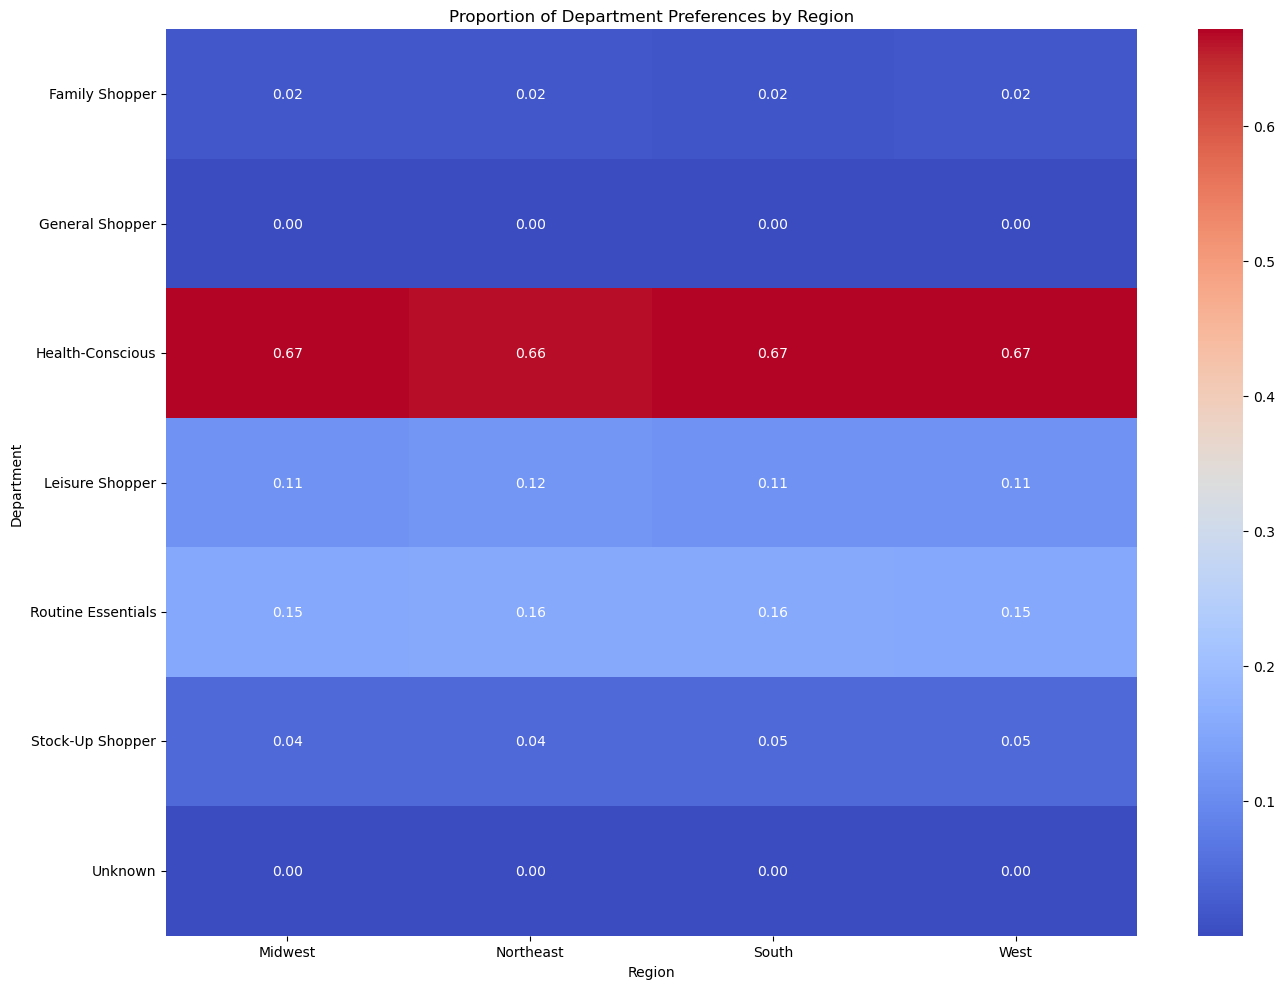

In [40]:
# getting each department count in each region
dept_region_counts = high_activity_df.groupby(['region', 'dept_type']).size().reset_index(name='count')

#getting sum of all departments in each region
dept_region_counts['region_total'] = dept_region_counts.groupby('region')['count'].transform('sum')

#calculating percentage of each department in each region
dept_region_counts['proportion'] = dept_region_counts['count'] / dept_region_counts['region_total']

# Pivot for heatmap
dept_heatmap = dept_region_counts.pivot(index='dept_type', columns='region', values='proportion')

plt.figure(figsize=(14, 10))
sns.heatmap(dept_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Proportion of Department Preferences by Region')
plt.ylabel('Department')
plt.xlabel('Region')
plt.tight_layout()

# exporting the map
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region_heatmap.png'), dpi=300, bbox_inches='tight')

##### This heatmap shows us that health-Conscious Shoppers dominate across all regions:
##### Midwest: 67%
##### South: 67%
##### West: 67%
##### Northeast: 66%
##### This suggests a nationwide preference for health-related products like produce, dairy, and fresh goods.
##### Routine Essentials are the 2nd most common segment (~15–16%) in all regions.
##### Indicates consistent demand for everyday household and personal care items.
##### Leisure Shoppers (~11–12%) are present in all regions.
##### Suggests a small but steady demand for non-essentials like alcohol, snacks, and pet items.
##### Stock-Up Shoppers (~4–5%) and Family Shoppers (~2%) form smaller niches.
##### These may represent occasional or bulk buyers and large-family households.
##### General Shopper and Unknown are effectively 0%.


#### Visualiozations needed to answer key questions.

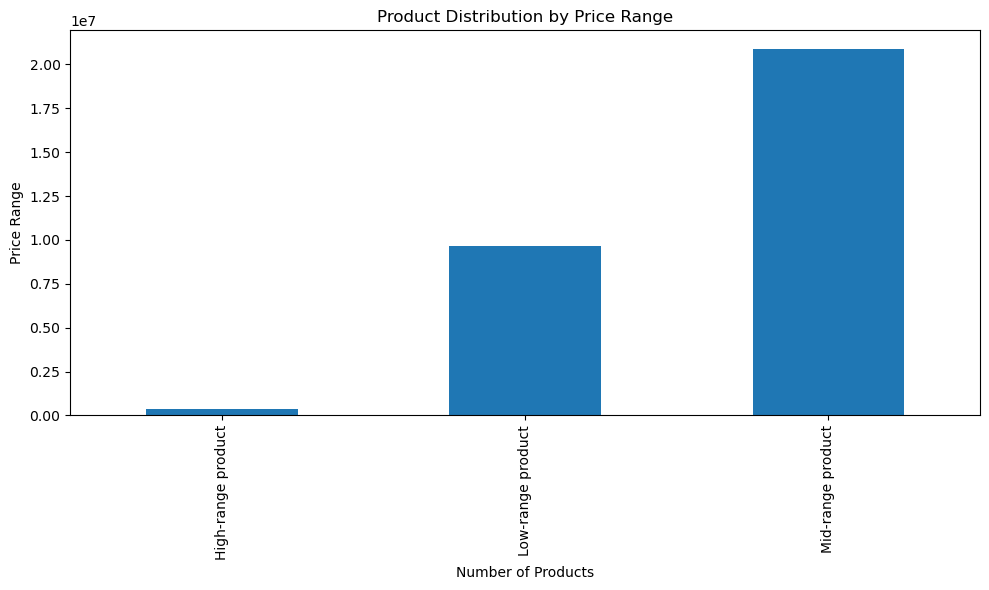

In [55]:
#Key Question 3: Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

# Count how many products fall into each price range
price_range_counts = high_activity_df['price_range_loc'].value_counts().sort_index()

# bar chart to represent price range of products
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar')

# Add titles and labels
plt.title('Product Distribution by Price Range')
plt.xlabel('Number of Products')
plt.ylabel('Price Range')
plt.tight_layout()

# exporting the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'products_by_price_range.png'), dpi=300, bbox_inches='tight')


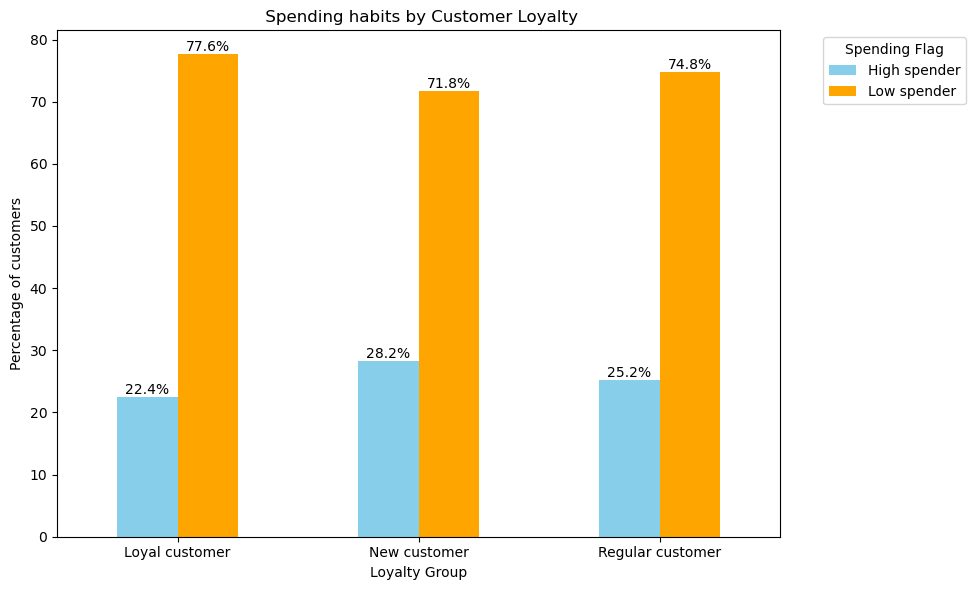

In [62]:
#Key Question 6: Are there differences in ordering habits based on a customer’s loyalty status?

# Crosstab normalized by row to get percentages
group_percents = pd.crosstab(
    high_activity_df['loyalty_flag'],
    high_activity_df['spending_flag'],
    normalize='index'  # Normalize each row
) * 100  # Convert to percentage

# Plot
ax = group_percents.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])

# Add labels and title
plt.title(' Spending habits by Customer Loyalty')
plt.xlabel('Loyalty Group')
plt.ylabel('Percentage of customers')
plt.xticks(rotation=0)
plt.legend(title='Spending Flag')

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

plt.tight_layout()

plt.legend(title='Spending Flag', loc='upper left', bbox_to_anchor=(1.05, 1))


# exporting the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spending.png'), dpi=300, bbox_inches='tight')


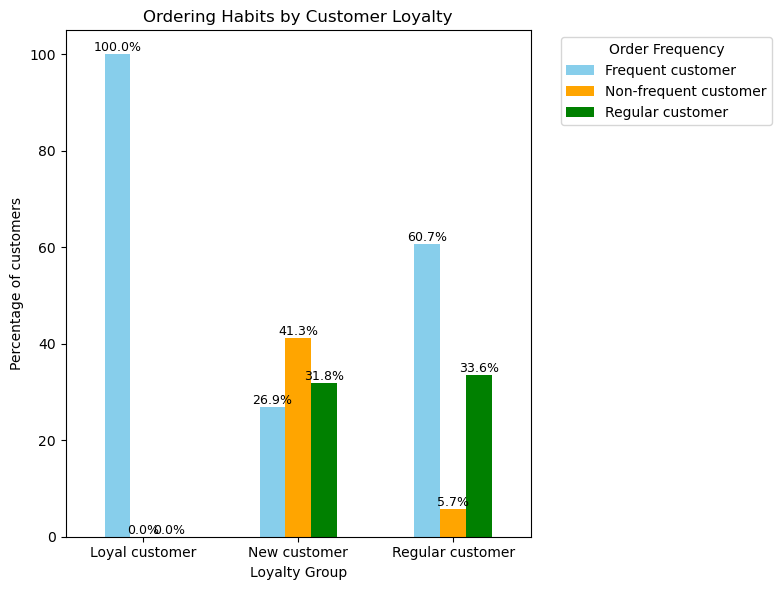

In [65]:
#Key Question 6: Are there differences in ordering habits based on a customer’s loyalty status?

# Normalize to get percentages per loyalty group
group_percents_2 = pd.crosstab(
    high_activity_df['loyalty_flag'],
    high_activity_df['order_frequency_flag'],
    normalize='index'
) * 100

# Plot
ax = group_percents_2.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange', 'green'])

plt.title('Ordering Habits by Customer Loyalty')
plt.xlabel('Loyalty Group')
plt.ylabel('Percentage of customers')
plt.xticks(rotation=0)
plt.legend(title='Order Frequency', loc='upper left', bbox_to_anchor=(1.05, 1))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.tight_layout()

# exporting the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_ordering.png'), dpi=300, bbox_inches='tight')


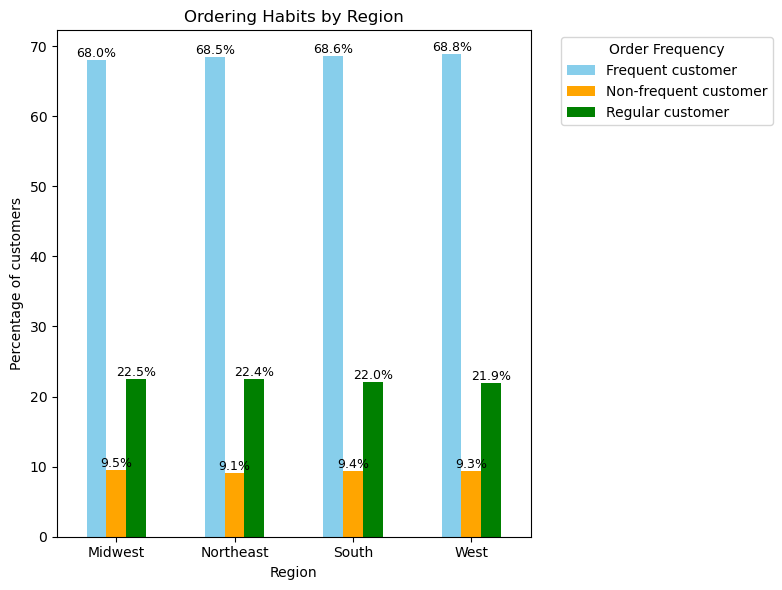

In [66]:
#Key Question 7:  Are there differences in ordering habits based on a customer’s region?

# Normalize to get percentages per loyalty group
group_percents_3 = pd.crosstab(
    high_activity_df['region'],
    high_activity_df['order_frequency_flag'],
    normalize='index'
) * 100

# Plot
ax = group_percents_3.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange', 'green'])

plt.title('Ordering Habits by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of customers')
plt.xticks(rotation=0)
plt.legend(title='Order Frequency', loc='upper left', bbox_to_anchor=(1.05, 1))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.tight_layout()

# exporting the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_ordering.png'), dpi=300, bbox_inches='tight')

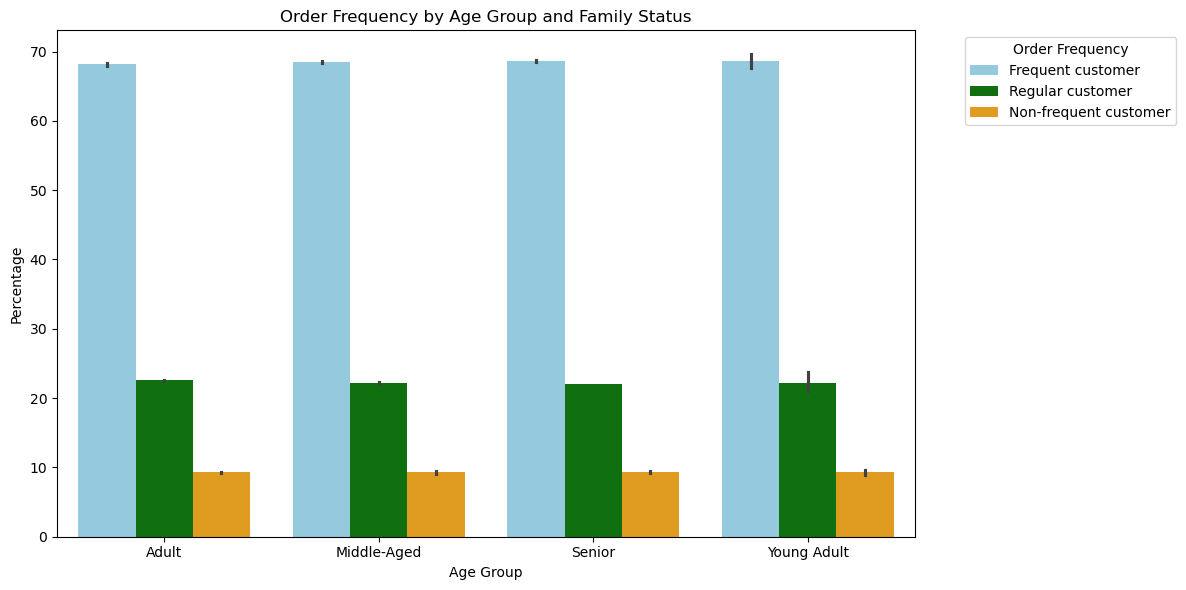

In [32]:
#Key Question 8: Is there a connection between age and family status in terms of ordering habits?

# Crosstab: percentage distribution per age group & family status
grouped = pd.crosstab(
    [high_activity_df['age_group'], high_activity_df['family_status']],
    high_activity_df['order_frequency_flag'],
    normalize='index'
) * 100

grouped = grouped.reset_index()

# Convert wide to long format
grouped_melted = pd.melt(
    grouped,
    id_vars=['age_group', 'family_status'],
    value_vars=['Frequent customer', 'Regular customer', 'Non-frequent customer'],
    var_name='Order Frequency',
    value_name='Percentage'
)

custom_palette = {
    'Frequent customer': 'skyblue',
    'Regular customer': 'green',
    'Non-frequent customer': 'orange'
}
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_melted,
    x='age_group',
    y='Percentage',
    hue='Order Frequency',
    palette=custom_palette
)

plt.title('Order Frequency by Age Group and Family Status')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Order Frequency', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# exporting the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_age_ordering.png'), dpi=300, bbox_inches='tight')

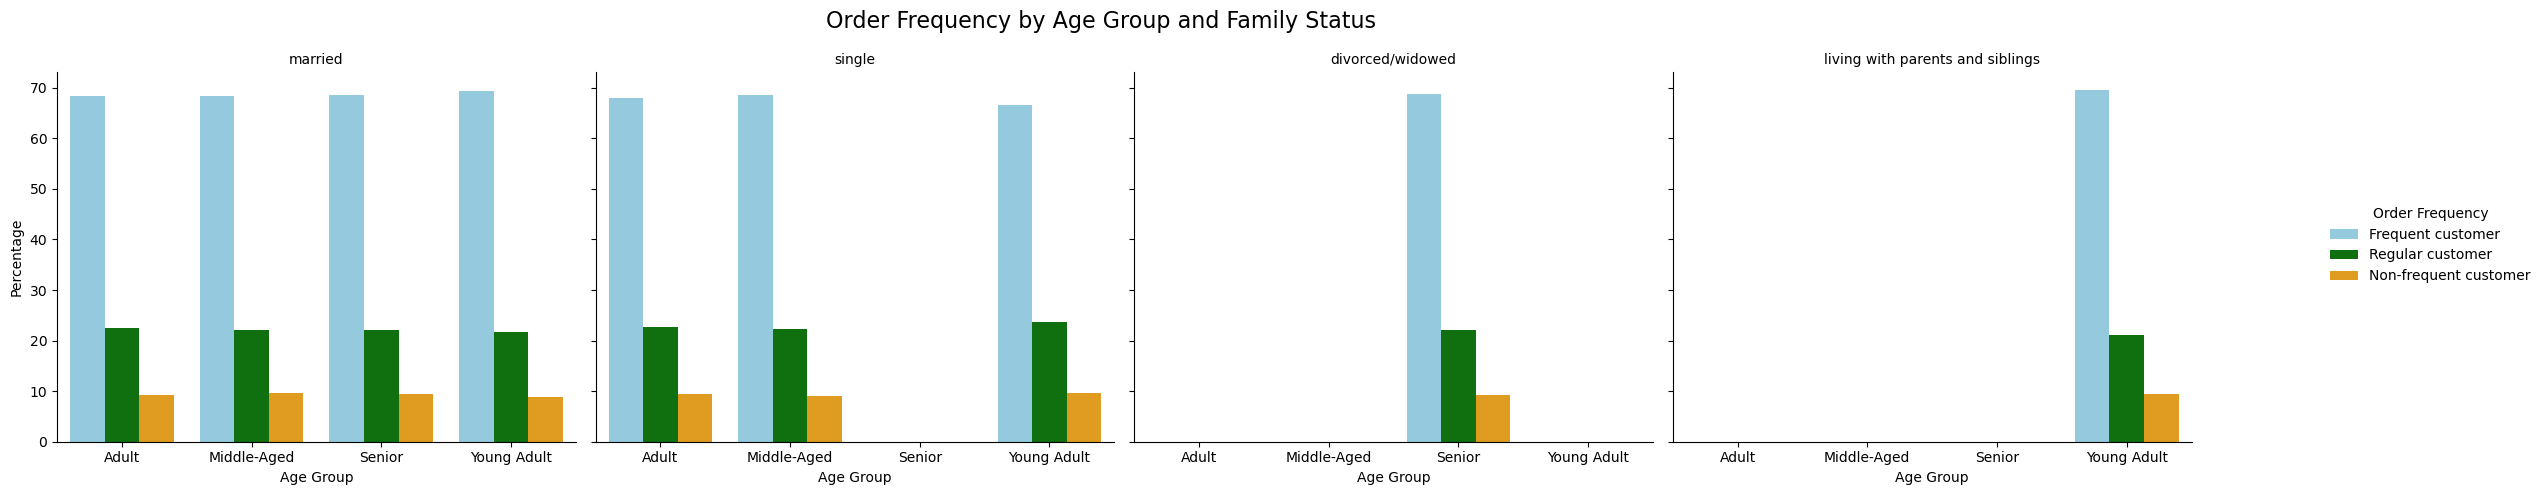

In [33]:
# Faceted grouped bar chart — one for each family_status
g = sns.catplot(
    data=grouped_melted,
    x='age_group',
    y='Percentage',
    hue='Order Frequency',
    col='family_status',
    kind='bar',
    palette=custom_palette,
   # height=5,
    #aspect=1.2,
    #col_wrap=2
)

# Adjust titles and labels
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Order Frequency by Age Group and Family Status', fontsize=16)
g.set_axis_labels('Age Group', 'Percentage')
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=0)

# Move legend
g._legend.set_bbox_to_anchor((1.15, 0.5))
g._legend.set_title('Order Frequency')
g._legend.set_frame_on(False)

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_age_ordering_2.png'), dpi=300, bbox_inches='tight')

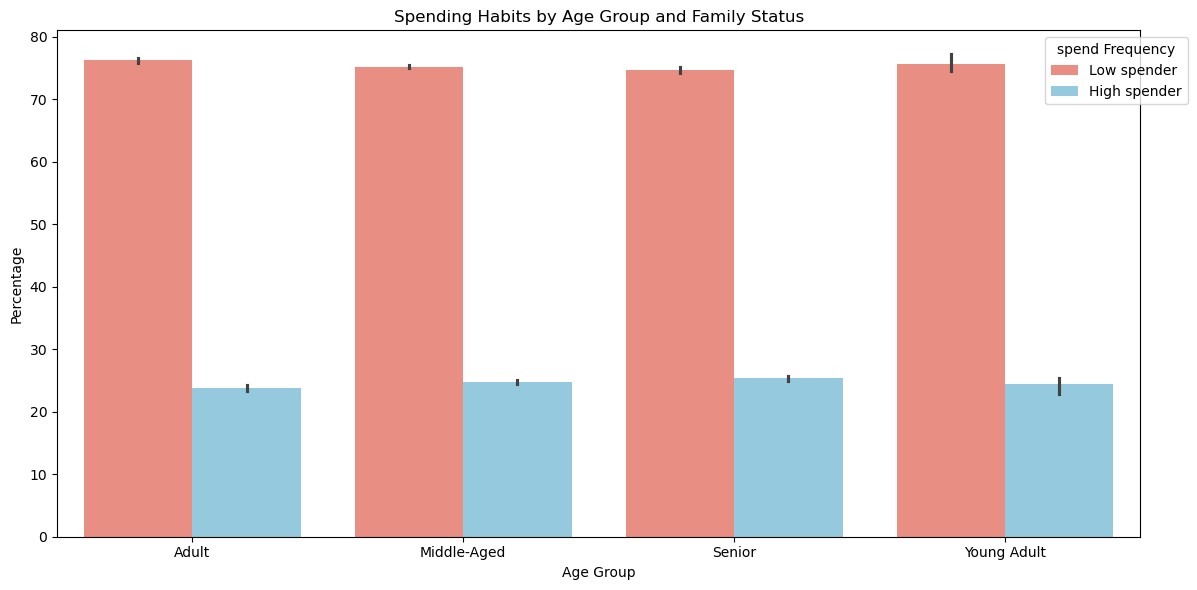

In [34]:
grouped_2 = pd.crosstab(
    [high_activity_df['age_group'], high_activity_df['family_status']],
    high_activity_df['spending_flag'],
    normalize='index'
) * 100

grouped_2= grouped_2.reset_index()


# Convert wide to long format
grouped_2_melted = pd.melt(
    grouped_2,
    id_vars=['age_group', 'family_status'],
    value_vars=['Low spender', 'High spender'],
    var_name='spend Frequency',
    value_name='Percentage'
)

custom_palette = {
    'High spender': 'skyblue',
    'Low spender': 'salmon',
   
}
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_2_melted,
    x='age_group',
    y='Percentage',
    hue='spend Frequency',
    palette=custom_palette
)

plt.title('Spending Habits by Age Group and Family Status')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='spend Frequency', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

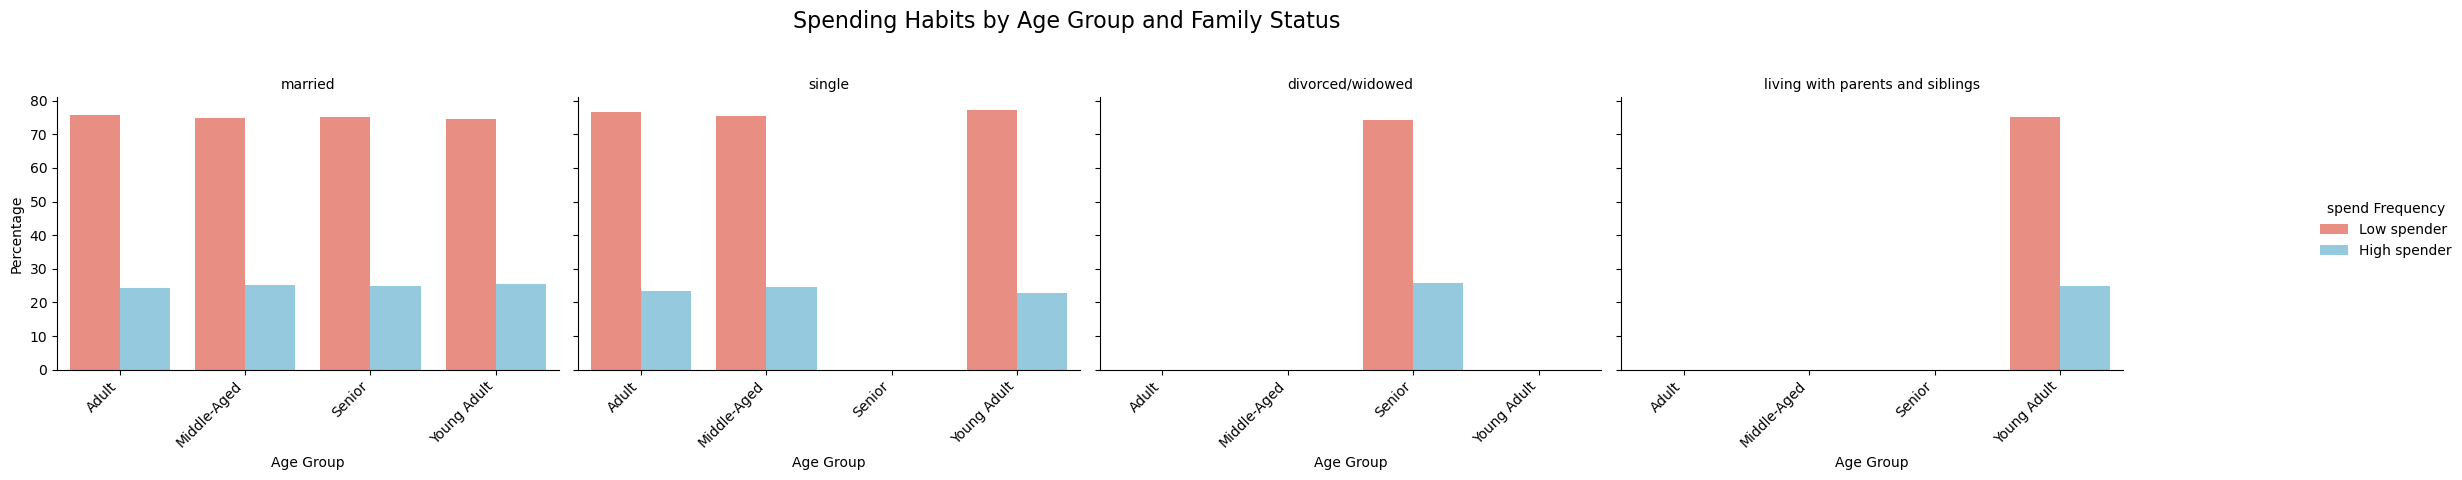

In [35]:
# Faceted grouped bar chart — one for each family_status
g = sns.catplot(
    data=grouped_2_melted,
    x='age_group',
    y='Percentage',
    hue='spend Frequency',
    col='family_status',
    kind='bar',
    palette=custom_palette,
    #height=5,
    #aspect=1.2,
    #col_wrap=2
)

# Adjust titles and labels
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Spending Habits by Age Group and Family Status', fontsize=16)
g.set_axis_labels('Age Group', 'Percentage')
g.set_titles(col_template="{col_name}")

g.set_xticklabels(rotation=45, ha='right')
# Move legend
g._legend.set_bbox_to_anchor((1.15, 0.5))
g._legend.set_title('spend Frequency')
g._legend.set_frame_on(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_age_spending.png'), dpi=300, bbox_inches='tight')

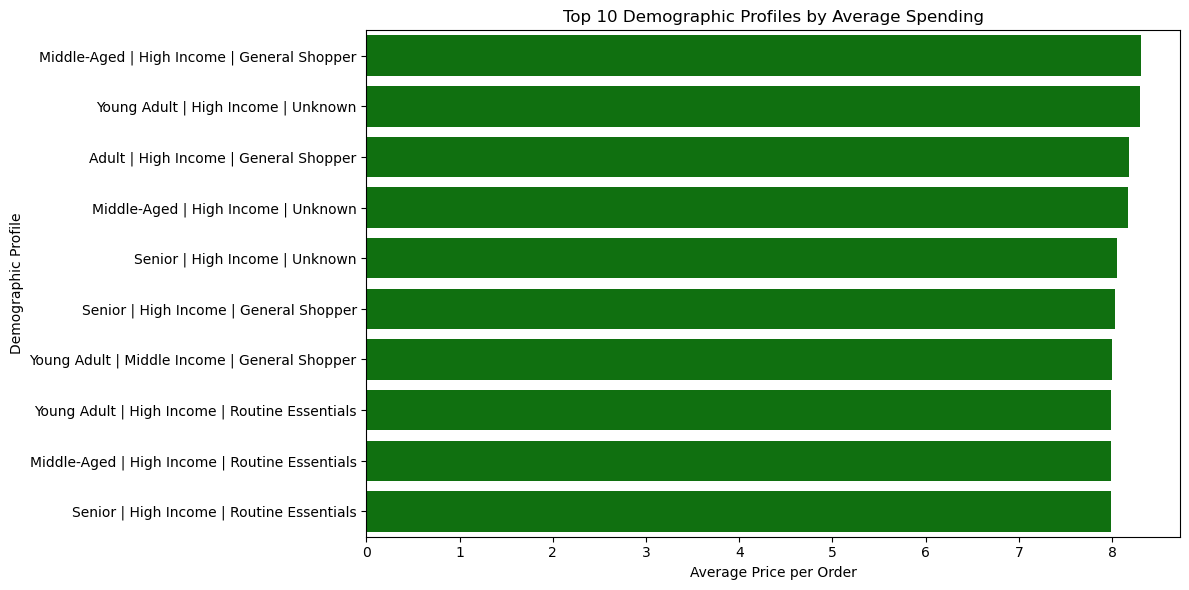

In [35]:
# spending habits profile 1 (profile_demographic)

# Sort and select top 10 demographic profiles by average price
top10 = high_activity_df.groupby('profile_demographic', as_index=False)['Average_price'].mean()
top10 = top10.sort_values(by='Average_price', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x='Average_price',
    y='profile_demographic',
    color = 'green'                
)
plt.title("Top 10 Demographic Profiles by Average Spending")
plt.xlabel("Average Price per Order")
plt.ylabel("Demographic Profile")
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_1_average_spending.png'), dpi=300, bbox_inches='tight')

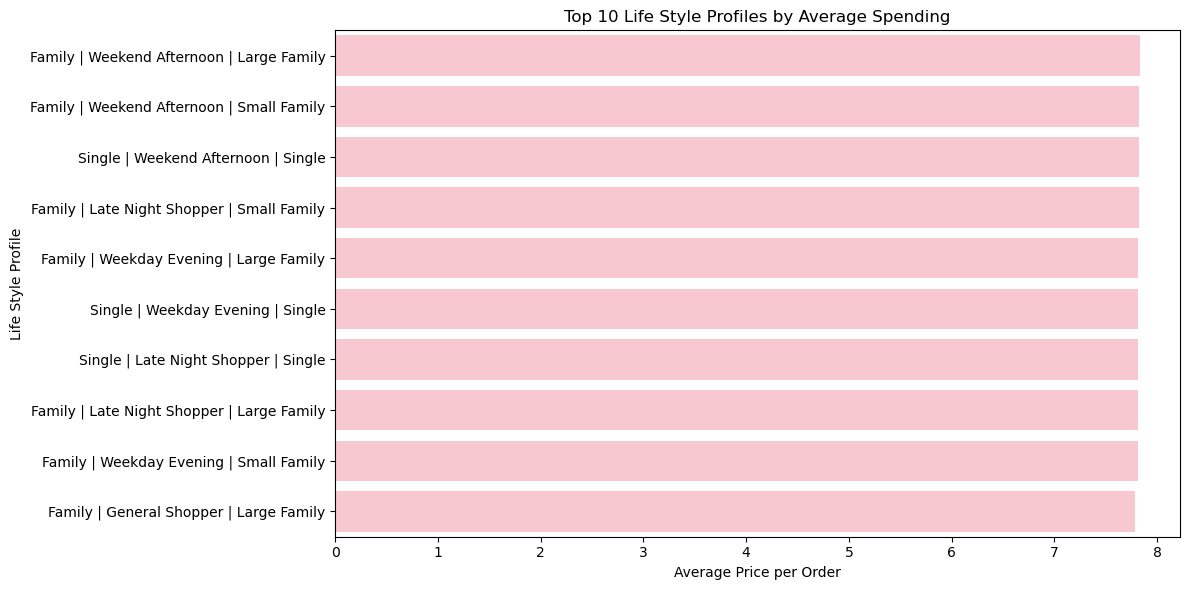

In [38]:
# spending habits profile 2 (profile_lifestyle)

# Sort and select top 10 demographic profiles by average price
top10 = high_activity_df.groupby('profile_lifestyle', as_index=False)['Average_price'].mean()
top10 = top10.sort_values(by='Average_price', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x='Average_price',
    y='profile_lifestyle',
    color = 'pink'

)
plt.title("Top 10 Life Style Profiles by Average Spending")
plt.xlabel("Average Price per Order")
plt.ylabel("Life Style Profile")
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_2_average_spending.png'), dpi=300, bbox_inches='tight')

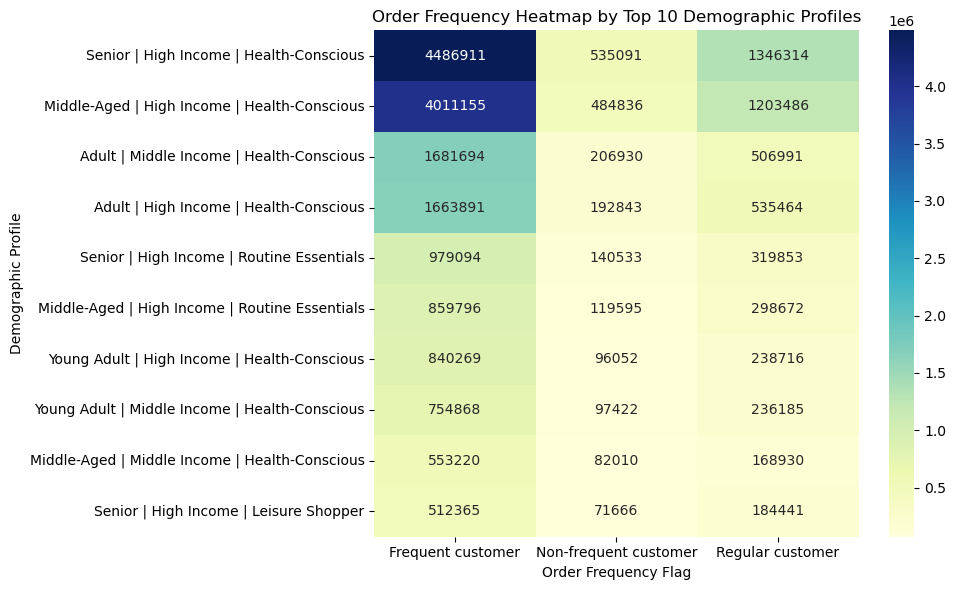

In [39]:
#profile 1 order frequency
# Step 1: Create the pivot table
pivot = high_activity_df.pivot_table(
    index='profile_demographic',
    columns='order_frequency_flag',
    values='user_id',     # Assuming 'user_id' is unique
    aggfunc='count'
).fillna(0)

# Step 2: Get total users per demographic and select top 10
top_10_profiles = pivot.sum(axis=1).nlargest(10).index

# Step 3: Filter pivot table for top 10 demographics
pivot_top10 = pivot.loc[top_10_profiles]

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_top10, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Order Frequency Heatmap by Top 10 Demographic Profiles")
plt.xlabel("Order Frequency Flag")
plt.ylabel("Demographic Profile")
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_1_order_frequency.png'), dpi=300, bbox_inches='tight')

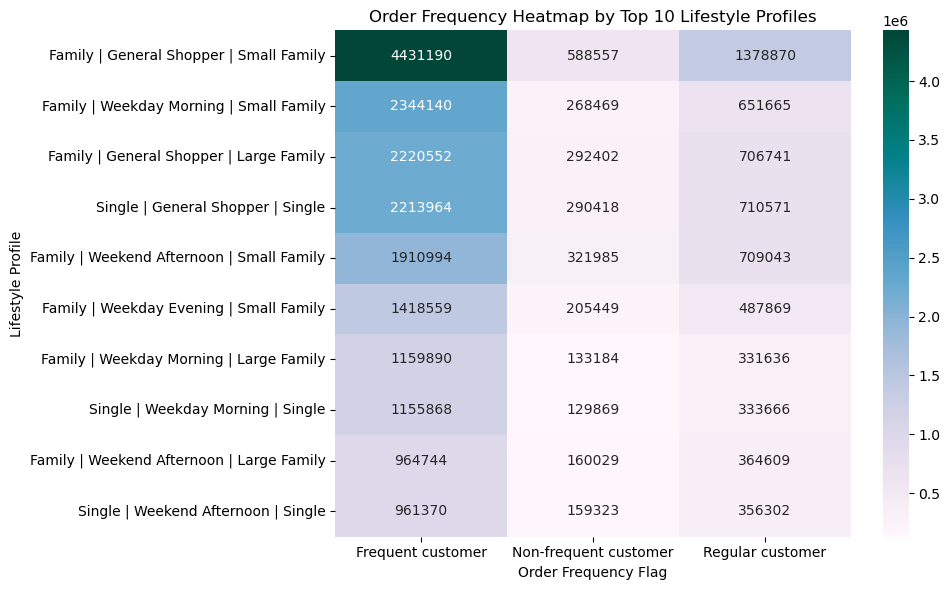

In [34]:
#profile 2 order frequency
# Step 1: Create the pivot table
pivot = high_activity_df.pivot_table(
    index='profile_lifestyle',
    columns='order_frequency_flag',
    values='user_id',     # Assuming 'user_id' is unique
    aggfunc='count'
).fillna(0)

# Step 2: Get total users per demographic and select top 10
top_10_profiles = pivot.sum(axis=1).nlargest(10).index

# Step 3: Filter pivot table for top 10 demographics
pivot_top10 = pivot.loc[top_10_profiles]

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_top10, annot=True, fmt=".0f", cmap="PuBuGn")
plt.title("Order Frequency Heatmap by Top 10 Lifestyle Profiles")
plt.xlabel("Order Frequency Flag")
plt.ylabel("Lifestyle Profile")
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_2_order_frequency.png'), dpi=300, bbox_inches='tight')